In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
income = pd.read_csv('https://raw.githubusercontent.com/ali-pie/casa0003gr1/main/new%20income?token=AITLPCDMUMIRVUOZMXYI5ITAT7UKC')

In [4]:
income['pc_change_inc'] = ((income['Total_yearly_income_2018'] - income['Total_yearly_income_2008']) / income['Total_yearly_income_2008']) * 100

In [6]:
pc_change = income[['MSOA_code', 'MSOA_name', 'Total_yearly_income_2018', 'pc_change_inc']]

In [7]:
cols18 = ['MSOA11CD', 'Major Category', '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809',
         '201810', '201811', '201812']

In [8]:
crime18 = pd.read_csv('Crime_by_MSOA.csv', usecols=cols18)

In [9]:
monthcols = ['201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809',
         '201810', '201811', '201812']
crime18['2018_total'] = crime18[monthcols].sum(axis=1)

In [10]:
crime18.drop(columns=monthcols, inplace=True)

In [11]:
msoa_total_crime = pd.pivot_table(crime18, index='MSOA11CD', columns='Major Category', values='2018_total')

In [12]:
df = pd.merge(msoa_total_crime, pc_change, left_index=True, right_on='MSOA_code').set_index('MSOA_code')

In [ ]:
pop = pd.read_csv('SAPE21DT14a-mid-2018-msoa-on-2019-LA-quinary-estimates-formatted.csv', usecols=['Area Codes', 'MSOA', 'All Ages'])

In [ ]:
pop.head()

In [ ]:
df = pd.merge(df, pop, how='left', left_index=True, right_on='Area Codes')

In [ ]:
df.columns

In [ ]:
crimecols = ['Burglary', 'Criminal Damage', 'Drugs', 'Other Notifiable Offences', 'Robbery', 'Theft and Handling',
            'Violence Against the Person']

In [25]:
df['All Ages'] = df['All Ages'].str.replace(',','').astype('float64')

### Location quotients for different types of crime

In [13]:
df.head()

,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,MSOA_name,Total_yearly_income_2018,pc_change_inc
MSOA_code,,,,,,,,,,
E02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,City of London 001,65400,18.995633
E02000002,79.0,59.0,13.0,10.0,22.0,184.0,251.0,Barking and Dagenham 001,39000,39.136639
E02000003,141.0,92.0,29.0,14.0,38.0,280.0,311.0,Barking and Dagenham 002,47800,44.149578
E02000004,55.0,29.0,33.0,4.0,13.0,92.0,133.0,Barking and Dagenham 003,43700,29.175288
E02000005,81.0,58.0,15.0,7.0,35.0,171.0,252.0,Barking and Dagenham 004,44900,50.469169


In [14]:
crimecols = ['Burglary', 'Criminal Damage', 'Drugs', 'Other Notifiable Offences', 'Robbery', 'Theft and Handling',
            'Violence Against the Person']

In [15]:
df['Total_crime'] = df[crimecols].sum(axis=1)

In [16]:
df.head()

,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,MSOA_name,Total_yearly_income_2018,pc_change_inc,Total_crime
MSOA_code,,,,,,,,,,,
E02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,City of London 001,65400,18.995633,0.0
E02000002,79.0,59.0,13.0,10.0,22.0,184.0,251.0,Barking and Dagenham 001,39000,39.136639,618.0
E02000003,141.0,92.0,29.0,14.0,38.0,280.0,311.0,Barking and Dagenham 002,47800,44.149578,905.0
E02000004,55.0,29.0,33.0,4.0,13.0,92.0,133.0,Barking and Dagenham 003,43700,29.175288,359.0
E02000005,81.0,58.0,15.0,7.0,35.0,171.0,252.0,Barking and Dagenham 004,44900,50.469169,619.0


#### Find proportion of crime for each category in all of London

In [18]:
ldn_cat_props = [df[c].sum() / df['Total_crime'].sum() for c in crimecols]

In [19]:
ldn_cat_props

[0.11829999391684451,
 0.07228030187348775,
 0.04331330857861485,
 0.02011538132073996,
 0.040306491720080495,
 0.3894597537191047,
 0.3162247688711277]

#### Find proportion of crime in each category for each MSOA

In [20]:
for c in crimecols:
    df[c] = df[c] / df['Total_crime']

In [24]:
df = df.fillna(0)

#### Divide proportion of crime for each category per MSOA by citywide proportion of crime in that category

In [26]:
for i,c in enumerate(crimecols):
    df[c] = df[c] / ldn_cat_props[i]

In [27]:
df.head()

,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,MSOA_name,Total_yearly_income_2018,pc_change_inc,Total_crime
MSOA_code,,,,,,,,,,,
E02000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,City of London 001,65400,18.995633,0.0
E02000002,1.080572,1.320820,0.485661,0.804421,0.883200,0.764481,1.284368,Barking and Dagenham 001,39000,39.136639,618.0
E02000003,1.317000,1.406434,0.739823,0.769044,1.041742,0.794414,1.086716,Barking and Dagenham 002,47800,44.149578,905.0
E02000004,1.295041,1.117593,2.122258,0.553908,0.898409,0.658007,1.171551,Barking and Dagenham 003,43700,29.175288,359.0
E02000005,1.106139,1.296335,0.559473,0.562185,1.402821,0.709321,1.287401,Barking and Dagenham 004,44900,50.469169,619.0


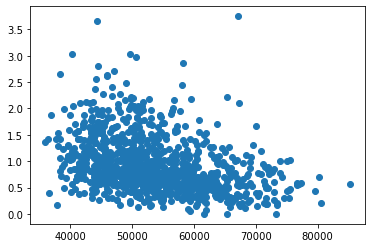

In [41]:
plt.scatter(df['Total_yearly_income_2018'], df['Drugs'])

In [ ]:
df['Violence Against the Person'].plot.hist()

In [43]:
df.to_csv('Crime_LQ_income_2018.csv')